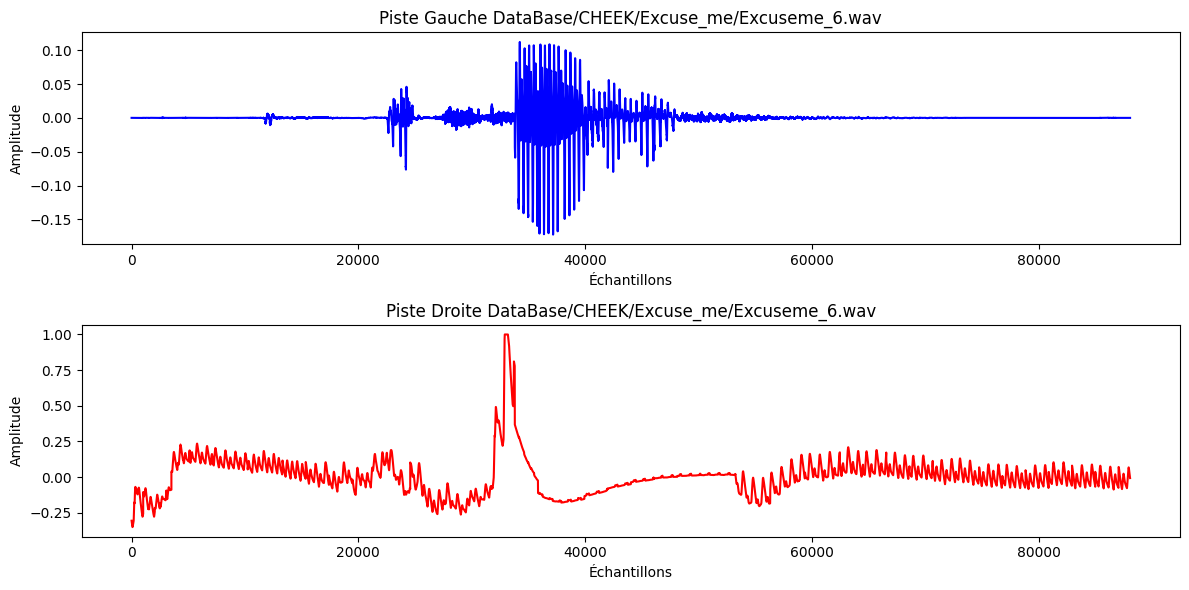

In [3]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Charger le fichier audio (stéréo)
file_path = "DataBase/CHEEK/Excuse_me/Excuseme_6.wav"
audio, fs = librosa.load(file_path, sr=None, mono=False)  # mono=False pour charger en stéréo

# Vérifier si l'audio est bien stéréo
if audio.ndim == 2:
    left_channel = audio[0, :]  # Piste gauche
    right_channel = audio[1, :]  # Piste droite

    # Tracé des pistes dans deux fenêtres séparées
    plt.figure(figsize=(12, 6))
    

    # Piste gauche
    plt.subplot(2, 1, 1)
    plt.plot(left_channel, color="blue")
    plt.title("Piste Gauche "+ file_path)
    plt.xlabel("Échantillons")
    plt.ylabel("Amplitude")

    # Piste droite
    plt.subplot(2, 1, 2)
    plt.plot(right_channel, color="red")
    plt.title("Piste Droite "+ file_path)
    plt.xlabel("Échantillons")
    plt.ylabel("Amplitude")

    plt.tight_layout()
    
    plt.show()

else:
    print("Le fichier audio n'est pas stéréo.")


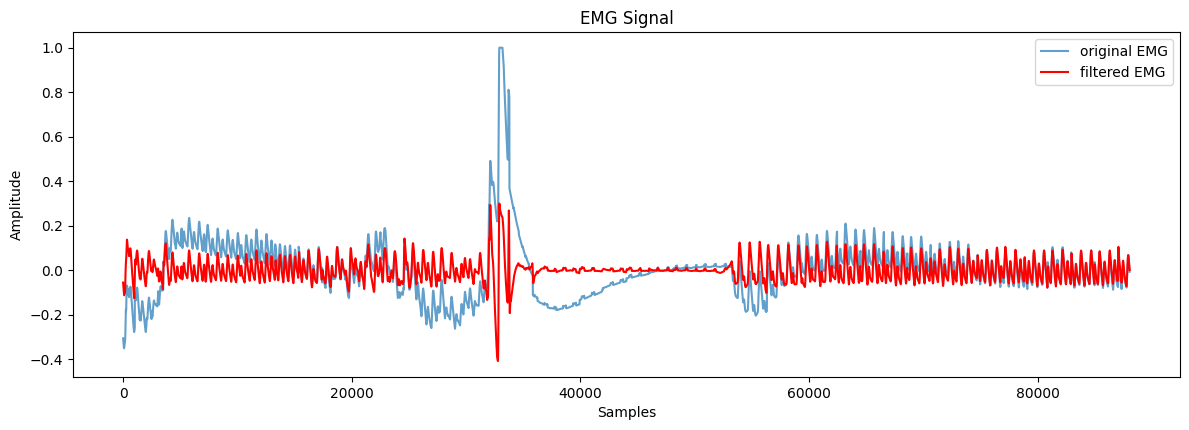

In [4]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt


fs = 44100  # Fréquence d'échantillonnage (remplacez par celle de vos données)
ecg_signal = audio[1, :]  # Piste droite (ECG)

order= 4
lowcut = 20  # Fréquence de coupure basse
highcut = 500.0  # Fréquence de coupure haute

# Conception du filtre passe-bande
b, a = signal.butter(order, [lowcut / (fs / 2), highcut / (fs / 2)], btype='band')

# Application du filtre
filtered_ecg = signal.filtfilt(b, a, ecg_signal)

# 3. Visualisation des signaux avant/après filtrage
plt.figure(figsize=(12, 8))

# Signal ECG avant et après filtrage
plt.subplot(2, 1, 2)
plt.plot(ecg_signal, label="original EMG", alpha=0.7)
plt.plot(filtered_ecg, label="filtered EMG", linewidth=1.5, color='red')
plt.title("EMG Signal")
plt.xlabel("Samples")
plt.ylabel("Amplitude")

plt.legend()

plt.tight_layout()
plt.show()


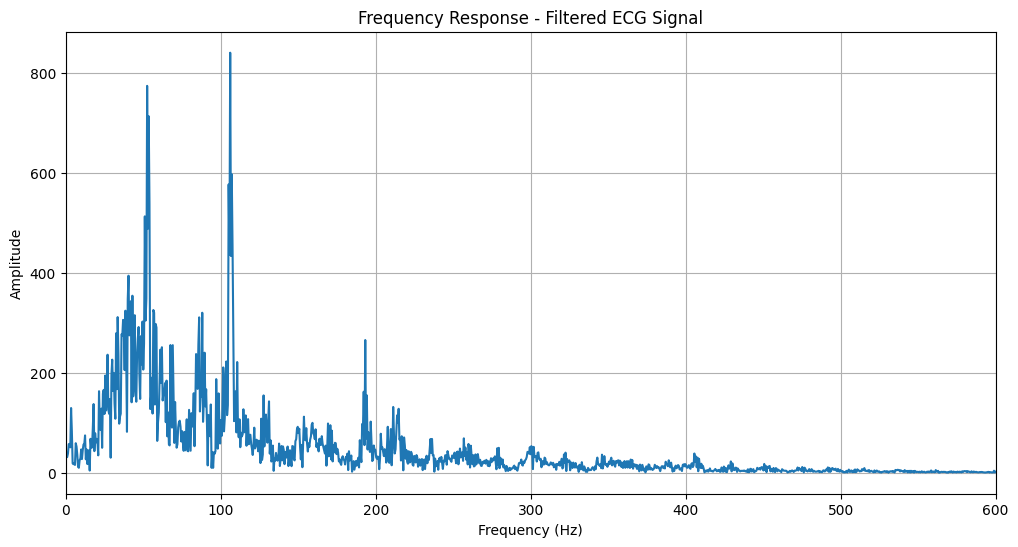

In [5]:
# 4. Visualisation en fréquentiel
def plot_frequency_response(signal, fs, title):
    freqs = np.fft.rfftfreq(len(signal), 1/fs)
    fft_spectrum = np.fft.rfft(signal)
    fft_spectrum = np.abs(fft_spectrum)

    plt.figure(figsize=(12, 6))
    plt.plot(freqs, fft_spectrum)
    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.xlim(0, 600)
    plt.ylabel("Amplitude")
    plt.grid()
    plt.show()


# Visualisation en fréquentiel du signal ECG filtré
plot_frequency_response(filtered_ecg, fs, "Frequency Response - Filtered ECG Signal")

(1025, 87)


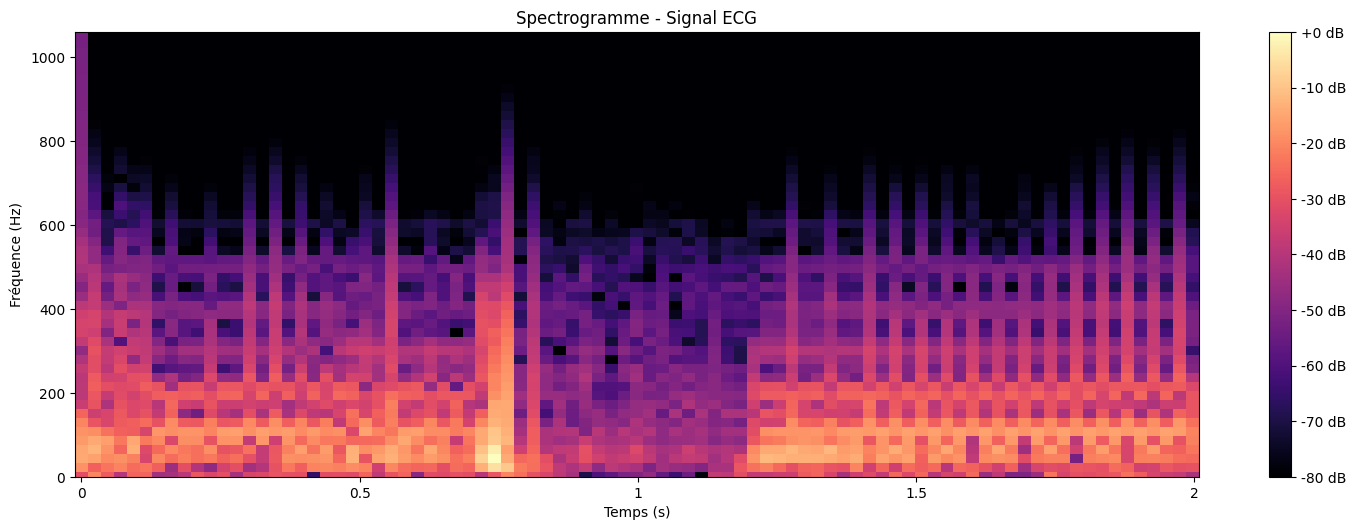

In [41]:
import librosa.display

# Paramètres pour la STFT
n_fft = 2048 # Taille de la fenêtre FFT #[16, 65, 1377] for 128,64
hop_length = 1024  # Décalage entre fenêtres
win_length = n_fft  # Longueur de la fenêtre

stft_ecg = librosa.stft(filtered_ecg, n_fft=n_fft, hop_length=hop_length, win_length=win_length)
print(stft_ecg.shape)
# Amplitude en dB
db_ecg = librosa.amplitude_to_db(np.abs(stft_ecg), ref=np.max)

# Visualisation des spectrogrammes
plt.figure(figsize=(15, 10))


# Spectrogramme du signal ECG
plt.subplot(2, 1, 2)
librosa.display.specshow(db_ecg, sr=fs, hop_length=hop_length, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogramme - Signal ECG")
plt.ylabel("Fréquence (Hz)")
plt.xlabel("Temps (s)")
plt.ylim(0,1060)

plt.tight_layout()
plt.show()


Si la STFT est trop grande, vous pouvez :

Tronquer les fréquences : Par exemple, ne garder que les 512 premières fréquences au lieu de 1025.

Sous-échantillonner le temps : Réduire le nombre de pas de temps (par exemple, de 173 à 86).

Utiliser une STFT avec moins de points : Réduire la résolution de la STFT.

(40, 87)


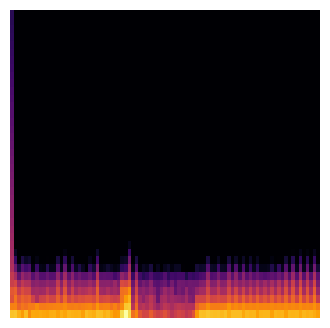

array([[-11.39954474, -10.84232181, -14.1010001 , ..., -13.60433474,
        -14.7557299 , -16.79772842],
       [-22.31374807, -22.06728221, -27.24468724, ..., -21.61047872,
        -19.33976228, -23.05153382],
       [-32.11968321, -24.45394324, -31.40470955, ..., -34.83109822,
        -24.49335081, -37.8110408 ],
       ...,
       [-68.06360486, -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ],
       [-68.44781879, -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ],
       [-68.70463568, -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ]])

In [47]:
#MEL
def audio_to_mel_spectrogram(signal, sr=44100, n_fft=2048, hop_length=1024, n_mels=40, save_path=None):
    # Calcul du spectrogramme Mel
    mel_spec = librosa.feature.melspectrogram(y=signal, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)  # Conversion en dB
    print(mel_spec.shape)
    # Affichage
    plt.figure(figsize=(4, 4))
    librosa.display.specshow(mel_spec_db, sr=sr, hop_length=hop_length, cmap='inferno')
    plt.axis('off')  # Supprime les axes pour un format compact

    if save_path:
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    else:
        plt.show()

    return mel_spec_db

audio_to_mel_spectrogram(filtered_ecg)

(40, 87)


<Figure size 1500x6000 with 0 Axes>

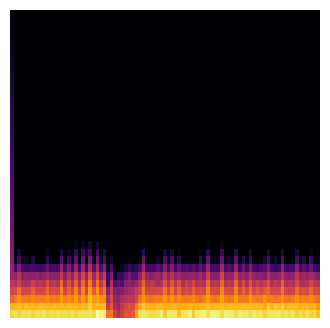

(40, 87)


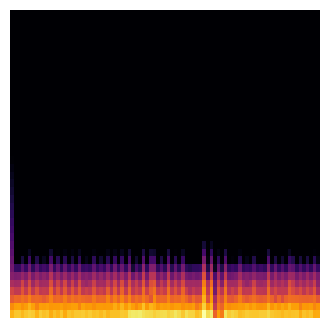

(40, 87)


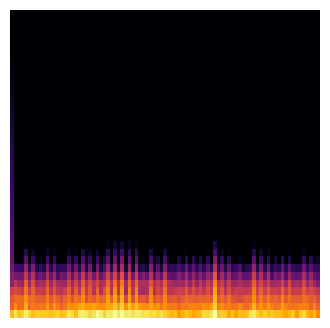

(40, 87)


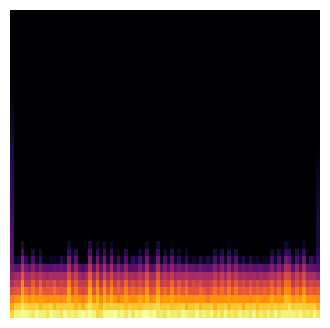

(40, 87)


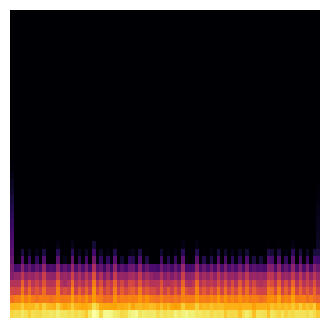

(40, 87)


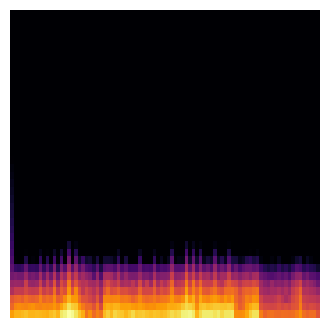

(40, 87)


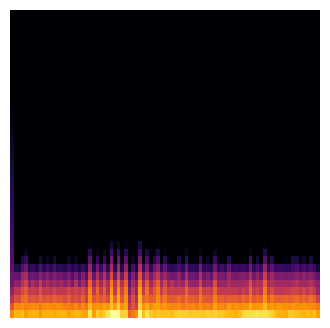

(40, 87)


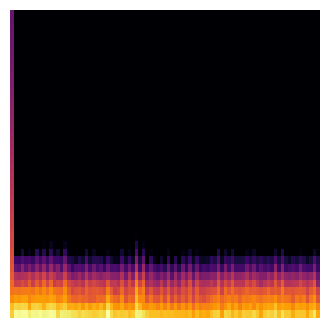

(40, 87)


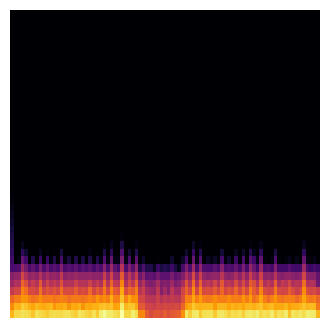

(40, 87)


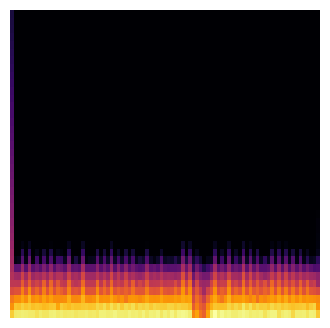

(40, 87)


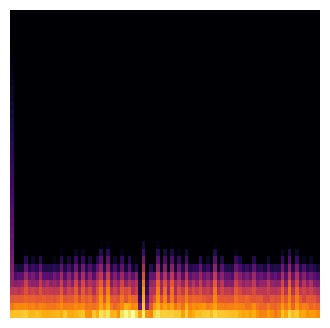

(40, 87)


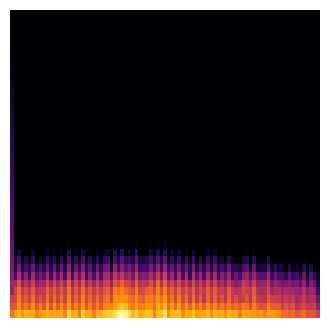

(40, 87)


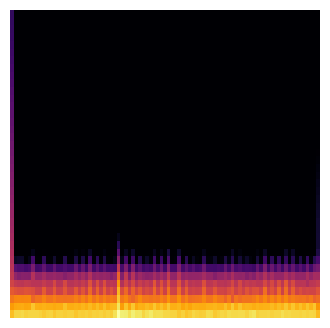

(40, 87)


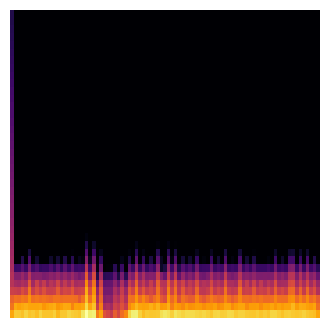

(40, 87)


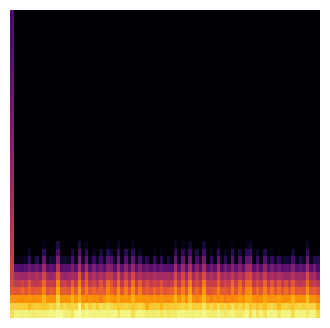

In [48]:
import os
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import librosa

def process_emg_signals_from_folder(folder_path):
    """
    Traite et visualise uniquement les signaux EMG (ECG) à partir d'un dossier contenant des fichiers audio.
    
    Args:
        folder_path (str): Chemin vers le dossier contenant les fichiers audio .wav.
    """
    # Récupérer tous les fichiers .wav dans le dossier
    file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.wav')]

    if not file_paths:
        print("Aucun fichier .wav trouvé dans le dossier.")
        return

    plt.figure(figsize=(15, len(file_paths) * 4))

    for i , file_path in enumerate(file_paths):
        # Charger le fichier audio
        try:
            audio, _ = librosa.load(file_path, sr=fs, mono=False)  # mono=False pour stéréo

            if audio.ndim != 2:
                print(f"Le fichier {file_path} n'est pas stéréo, il sera ignoré.")
                continue

            # Canal droit : EMG (ECG)
            ecg_signal = audio[1, :]

            ecg_signal = signal.filtfilt(b, a, ecg_signal)
            audio_to_mel_spectrogram(ecg_signal)
        
        except :
            print("bu")


# Utilisation de la fonction
folder_path = "DataBase/CHEEK_test"  # Remplacez par le chemin de votre dossier
process_emg_signals_from_folder(folder_path)


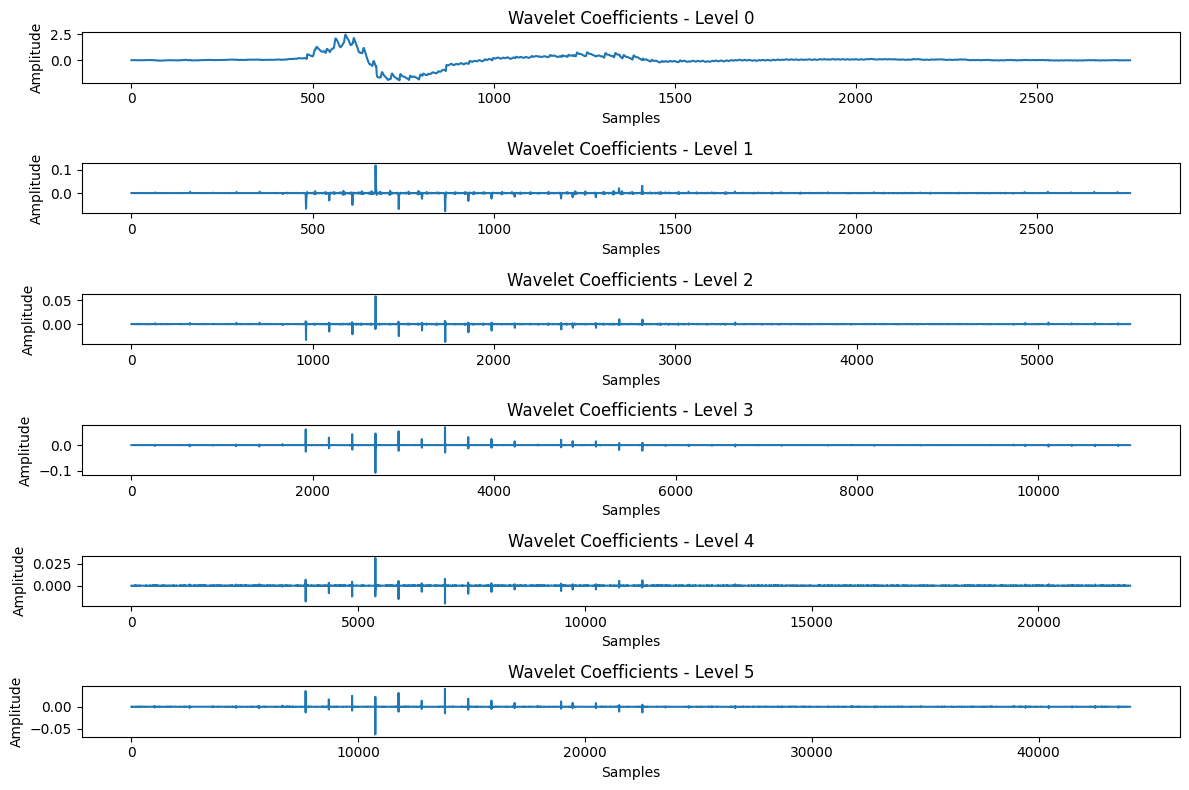

In [75]:
import pywt

# Perform wavelet transform
coeffs = pywt.wavedec(ecg_signal, 'db4', level=5)

# Plot the wavelet coefficients
plt.figure(figsize=(12, 8))
for i, coeff in enumerate(coeffs):
    plt.subplot(len(coeffs), 1, i + 1)
    plt.plot(coeff)
    plt.title(f'Wavelet Coefficients - Level {i}')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()